<a href="https://colab.research.google.com/github/Orenjonas/explore-outlier-detection/blob/main/copula_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose

Implement and explore outlier detection using copulas in the COPOD algorithm implemented in the [PyOD](https://github.com/yzhao062/pyod) library.

     |████████████████████████████████| 111 kB 5.0 MB/s 
  Created wheel for pyod: filename=pyod-0.9.3-py3-none-any.whl size=130719 sha256=705fd2b67249aad70a32c5893d4087729aaf7bd1e7e1f481cc1e11115daec812
  Stored in directory: /root/.cache/pip/wheels/ac/94/65/d29b87d4ad6defcec32686063e9bbaf5907a259eb2d8342174
Successfully built pyod


# Generate data

In [ ]:
!pip install pyod            # normal install

from pyod.utils.data import generate_data
import numpy as np
X_train, y_train, X_test, y_test = \
        generate_data(n_train=200,
                      n_test=100,
                      n_features=5,
                      contamination=0.1,
                      random_state=3) 
X_train = X_train * np.random.uniform(0, 1, size=X_train.shape)
X_test = X_test * np.random.uniform(0,1, size=X_test.shape)

/usr/local/lib/python3.7/dist-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.9.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
train = pd.DataFrame(X_train)
train['y'] = y_train

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)

In [ ]:
X_r = pca.fit(X_train).transform(X_train)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X_train, y_train).transform(X_train)

In [ ]:
np.shape(X_r2)

(200, 1)

IndexError: ignored

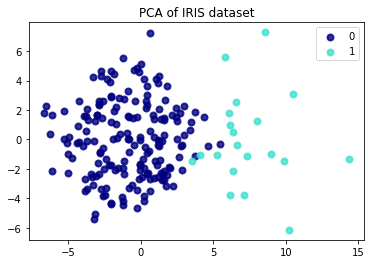

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

target_name = ['0', '1']

for X in [X_r, X_r2]:
    for color, i, target_name in zip(colors, [0, 1], target_name):
        plt.scatter(X[y_train == i, 0], X[y_train == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS dataset')

plt.show()

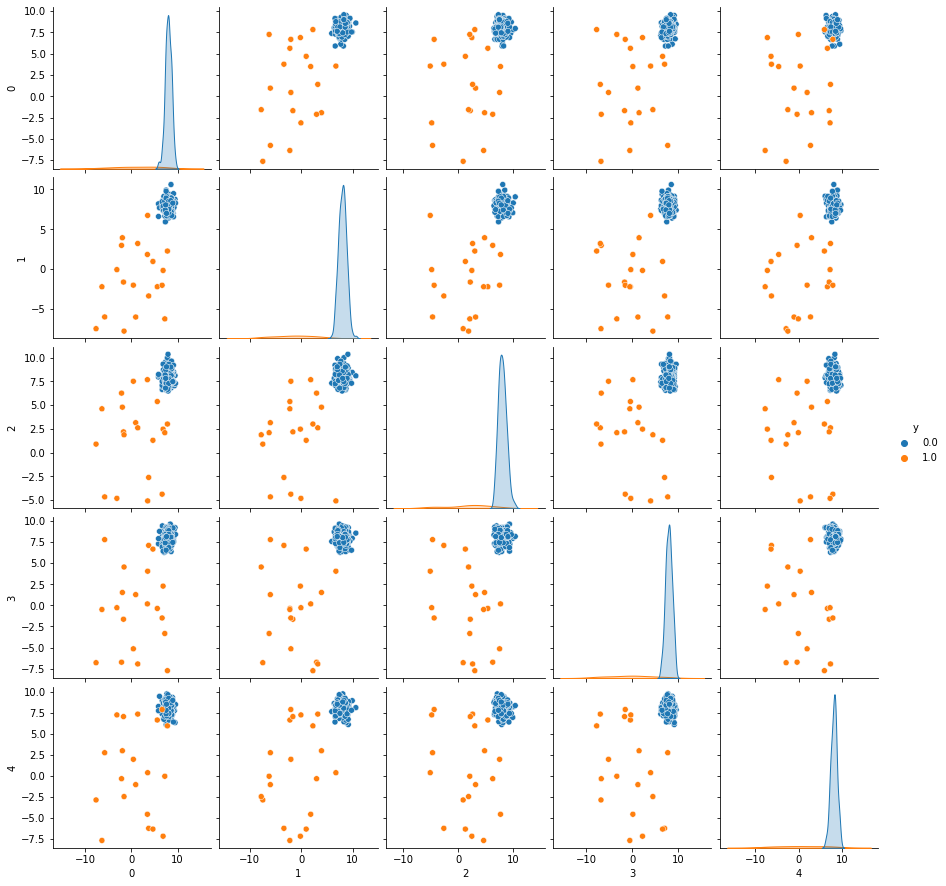

In [ ]:
# fig, ax = plt.subplots(figsize=(11,9))

sns.pairplot(train, hue='y')